## Data Loading

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
df = pd.DataFrame()
path = './data/'
for file in os.listdir(path):
    if file.endswith('.txt') and file.startswith('D'):
        df = df.append(pd.read_csv(path+file, header=None).transpose().assign(diode=int(file[1:2])))
df=df.rename({0: "Voltage", 1: "Current"}, axis='columns')


## Manually selected values from where to fit and assigning their colors

In [78]:
cut_vals = pd.DataFrame({'cut_val':[3,3,3,4,-4,-4], 'diode': range(1,7), 'names':['Blue', 'Yellow', 'Purple', 'Red', 'Orange', 'Green']}) 

In [79]:
df=df.merge(cut_vals, on=['diode'])

In [80]:
df

Voltage   Current  diode  cut_val   names
0      1.95  15.50000      5       -4  Orange
1      2.05  30.80000      5       -4  Orange
2      1.50   0.00040      5       -4  Orange
3      1.60   0.00046      5       -4  Orange
4      1.70   0.05780      5       -4  Orange
5      1.80   0.52200      5       -4  Orange
6      1.90   1.65000      5       -4  Orange
7      2.00  21.80000      5       -4  Orange
8      1.65   0.00500      6       -4   Green
9      1.75   0.05500      6       -4   Green
10     1.90   0.70200      6       -4   Green
11     2.00   1.77000      6       -4   Green
12     2.10   2.97000      6       -4   Green
13     2.20  17.00000      6       -4   Green
14     2.30  23.50000      6       -4   Green
15     2.40  30.80000      6       -4   Green
16     1.50   0.00140      4        4     Red
17     1.60   0.01500      4        4     Red
18     1.70   0.12500      4        4     Red
19     1.80   0.74000      4        4     Red
20     1.90   1.93000      4        4     Red
21     2.00  13.00000      4        4     Red
22     2.10  20.60000      4        4     Red
23     2.20  29.80000      4        4     Red
24     1.61   0.00160      2        3  Yellow
25     1.80   0.19200      2        3  Yellow
26     1.90   0.87700      2        3  Yellow
27     2.00   1.86000      2        3  Yellow
28     2.10   3.14000      2        3  Yellow
29     2.20  13.50000      2        3  Yellow
30     2.30  18.40000      2        3  Yellow
31     2.40  23.50000      2        3  Yellow
32     2.50  28.30000      2        3  Yellow
33     2.33   0.01560      1        3    Blue
34     2.59   1.16000      1        3    Blue
35     2.91  16.90000      1        3    Blue
36     2.40   0.07500      1        3    Blue
37     2.70   2.45000      1        3    Blue
38     2.80  11.20000      1        3    Blue
39     3.00  23.00000      1        3    Blue
40     3.10  30.30000      1        3    Blue
41     2.70   0.01340      3        3  Purple
42     2.80   0.07320      3        3  Purple
43     2.90   0.40500      3        3  Purple
44     3.00   1.26000      3        3  Purple
45     3.10   8.33000      3        3  Purple
46     3.20  13.50000      3        3  Purple
47     3.30  19.80000      3        3  Purple
48     3.40  27.80000      3        3  Purple

In [6]:
def lin_func(x, a, b):
    return a*x +b


2.6534046771879694+-0.24021093653739967

1.988915800067942+-0.348364995312481

2.9809759875653934+-0.24906270442716671

1.8709352044731937+-0.20044114658216683

1.8820000000000001+-0.4397692066075799

2.043671519637233+-0.5914866750724322


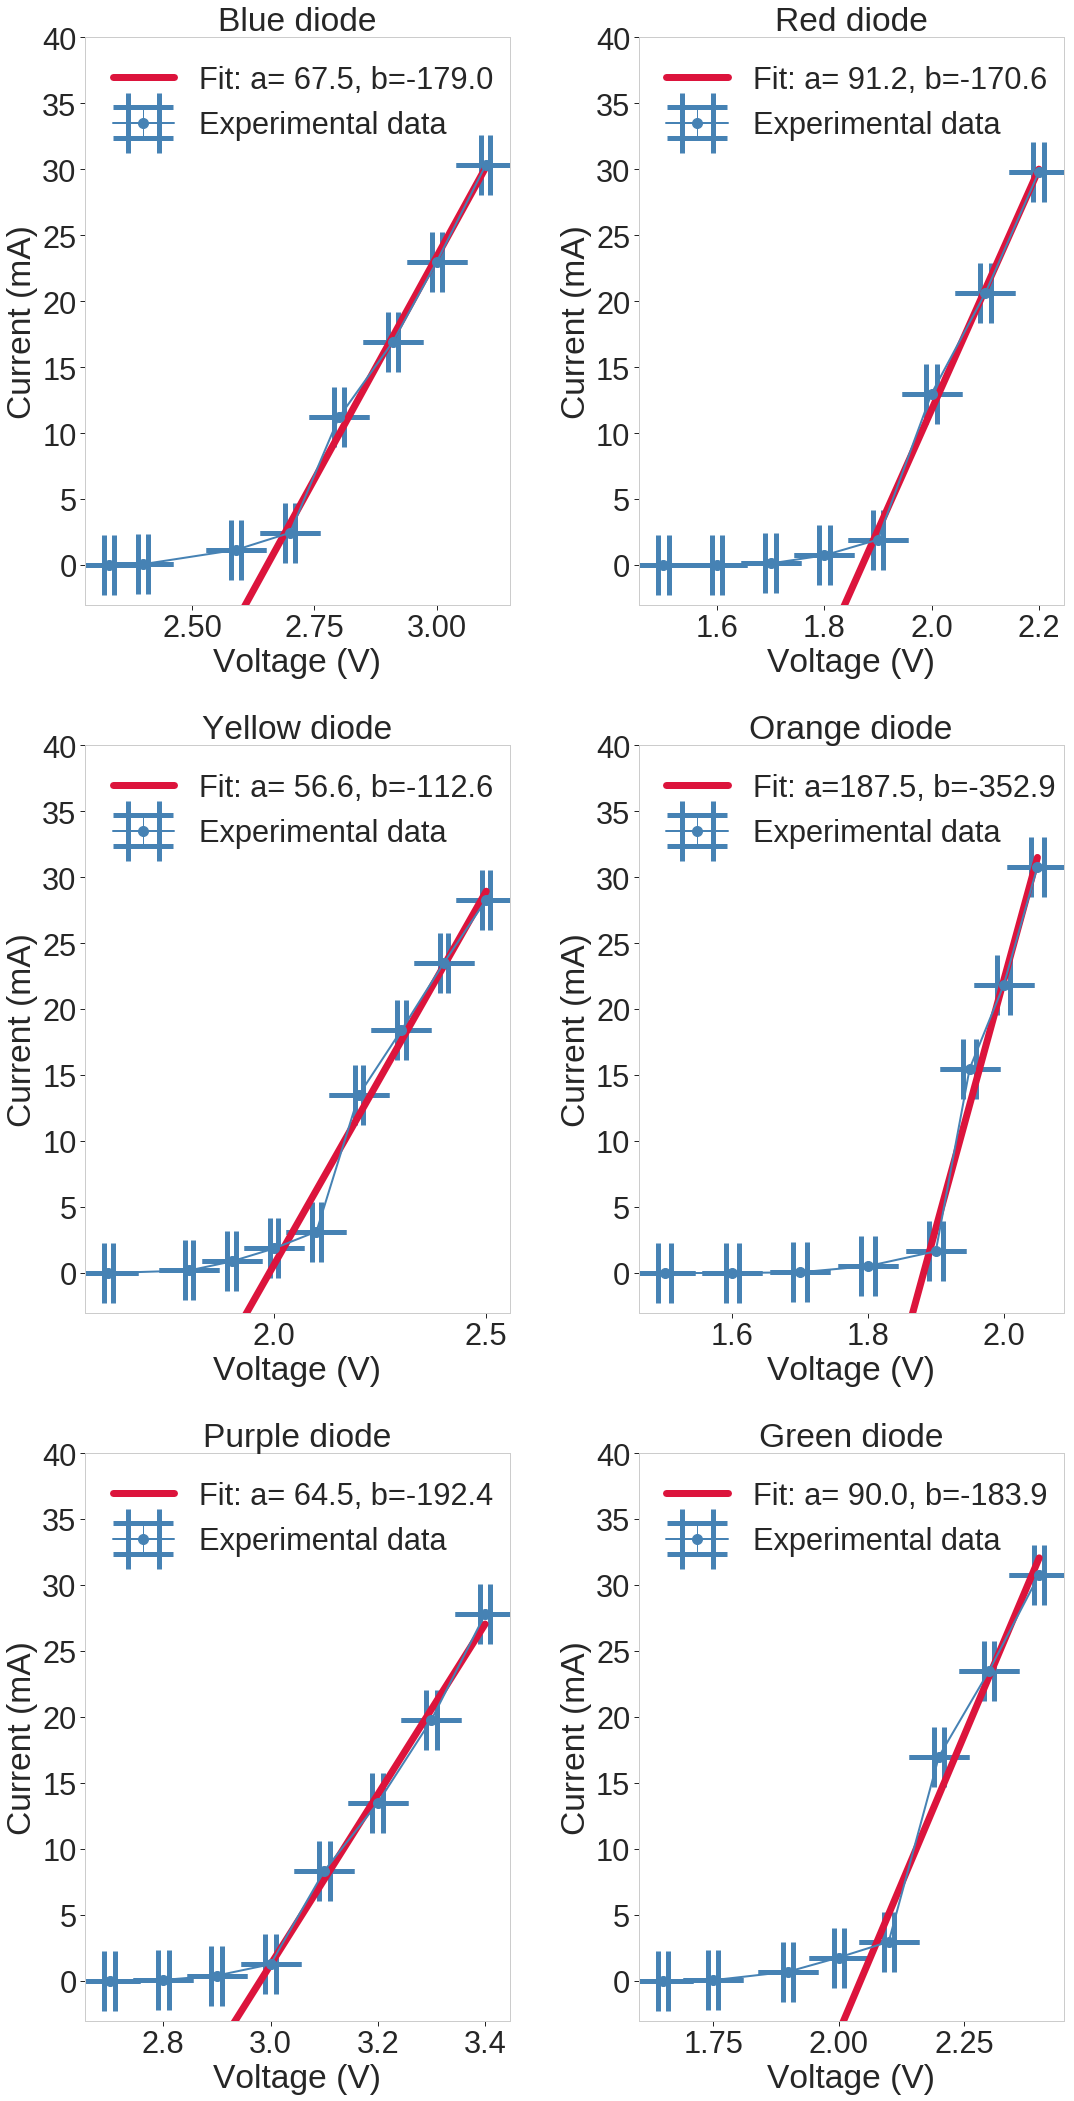

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('paper', font_scale=3.5)
from scipy.optimize import curve_fit
df = df.sort_values(by=('diode'))
fig, ax = plt.subplots(3, 2, figsize=(16,30))
# for each diode draw a subploz
for diode in df.diode.unique():
    data = df[df.diode == diode]
    data = data.sort_values(by=('Current')) # important to sort values by curent for cutting
    ax[(diode-1)%3, (diode-1)//3].title.set_text(data.names.values[0]+" diode")
    cut_val = data.cut_val.values[0]
    # fitting the linear function from
    popt, pcov = curve_fit(lin_func, data.Voltage.dropna().values[cut_val:], data.Current.dropna().values[cut_val:])
    a_dev, b_dev = np.sqrt(np.diag(pcov))
    x_intercept = -1*popt[1]/popt[0]
    x_err = (((((-1)*popt[1])+b_dev)/(popt[0]-a_dev))-((((-1)*popt[1])-b_dev)/(popt[0]+a_dev)))/2
    print(str(x_intercept)+'+-'+str(x_err))
    ax[(diode-1)%3, (diode-1)//3].errorbar(data.Voltage.values, data.Current.values, yerr=5*10**-4, xerr=0.01,fmt='-o',
                 capsize=30, elinewidth=1, capthick=5, lw=2,
                 markersize=10, color='steelblue',label="Experimental data".format(diode))
    ax[(diode-1)%3, (diode-1)//3].plot(data.Voltage.dropna().values[-7:], lin_func(data.Voltage.dropna().values[-7:], *popt), color='crimson', lw=7,
             label='Fit: a=%5.1f, b=%5.1f' % tuple(popt))
    ax[(diode-1)%3, (diode-1)//3].legend(loc=2)
    ax[(diode-1)%3, (diode-1)//3].set_ylim([-3,40])
    ax[(diode-1)%3, (diode-1)//3].grid()
    ax[(diode-1)%3, (diode-1)//3].set_ylabel("Current (mA)")
    ax[(diode-1)%3, (diode-1)//3].set_xlabel("Voltage (V)")
plt.tight_layout()
plt.show()